In [19]:
# Imports
from clases.red_rddas_model import RedRddasModel
from clases.experiment_model import ExperimentModel

import ray
import time
import pandas as pd
import numpy as np
import pickle  # library to serialization object

from itertools import product  # generate combinations of numbers

# Ray Configurations
# ray.shutdown()
#runtime_env = {"working_dir": "/home/reynaldo/Documents/RESEARCH/SynEstRDDA", "pip": ["requests", "pendulum==2.1.2"]}
#ray.init(address='ray://172.17.163.253:10001', runtime_env=runtime_env, log_to_driver=False)
# ray.init(address='ray://172.17.163.244:10001', runtime_env=runtime_env , log_to_driver=False, num_cpus=12)
# ray.init(log_to_driver=False, num_cpus=12)

In [20]:
# Parameters
n_rdds = 3
n_of_variables_rdda = 2
n_of_signals_rdda = 2
n_exit_variables = 2
n_clauses_function = 2
type_network = "ALEATORY"

# Generate the RDDA
o_rdda = RedRddasModel(number_of_rddas=n_rdds,number_of_variables_rdda=n_of_variables_rdda,number_of_signals_rdda=n_of_signals_rdda,number_exit_variables=n_exit_variables,number_clauses_function=n_clauses_function)

# Show the RDDA
o_rdda.show_description()

# Generate the RDDs
o_rdda.generate_rddas(type_network=type_network)

# Show the list of RDDs
o_rdda.show_rdds()

# Find the attractors by RDD
o_rdda = RedRddasModel.find_attractors_rddas(o_rdda)

# Show the attractors of the RDDs by Signal
o_rdda.show_attractors()

# Calculation the Attractor Pairs
o_rdda = RedRddasModel.calculation_compatible_pairs(o_rdda)

# Show the list of attractor pairs
o_rdda.show_attractor_pairs()

# Assembly the attractor fields
l_partial_paths = o_rdda.assembly_attractor_fields_pruning(o_rdda)

# Show the list of attractor fields
o_rdda.show_attractor_fields_detail()

NETWORK RDDA DESCRIPTION
Number of RDDs : 3
Number of variables by RDD : 2
Number of coupling signals by RDD : 2
Maximum number of exit variables by signal : 3
Maximum number of clauses by function : 3
List of RDDs of the RDDA
RDDA DESCRIPTION
Name of RDDA : 1
List of intern variables : 
[1, 2]
List of coupling signals : 
---------------
Network Input : 1
Network Output : 2
Variables : [3, 4]
Name Variable : 7
Coupling Function :  3 ∨ 4 
Truth Table: {'11': '1', '10': '1', '01': '1', '00': '0'}
---------------
---------------
Network Input : 1
Network Output : 3
Variables : [6, 5]
Name Variable : 8
Coupling Function :  6 ∨ 5 
Truth Table: {'11': '1', '10': '1', '01': '1', '00': '0'}
---------------
Description of Variables
V: 1 CNF :[[8, 7, 1], [8]]
V: 2 CNF :[[8, 7, 2], [2, 7]]
RDDA DESCRIPTION
Name of RDDA : 2
List of intern variables : 
[3, 4]
List of coupling signals : 
---------------
Network Input : 2
Network Output : 3
Variables : [5, 6]
Name Variable : 9
Coupling Function :  5 

In [21]:
# Assembly the attractor fields and save the partial solutions
l_partial_solutions = o_rdda.assembly_attractor_fields_experiment()

# partial_solutions = [ iteration = [] ]
for iteration in l_partial_solutions:
    print("Number of Partial Solutions:", len(iteration))
    for partial_solution in iteration:
        print("Part :", partial_solution)

print(o_rdda.list_signal_pairs)
for l_pairs in o_rdda.list_signal_pairs:
    print("Number of pairs from list :", len(l_pairs))

OUTPUT 6
Number of Partial Solutions: 120
Part : [[0, 6], [0, 14]]
Part : [[0, 6], [0, 17]]
Part : [[0, 6], [0, 19]]
Part : [[0, 6], [0, 22]]
Part : [[0, 8], [0, 14]]
Part : [[0, 8], [0, 17]]
Part : [[0, 8], [0, 19]]
Part : [[0, 8], [0, 22]]
Part : [[0, 10], [0, 14]]
Part : [[0, 10], [0, 17]]
Part : [[0, 10], [0, 19]]
Part : [[0, 10], [0, 22]]
Part : [[0, 12], [0, 14]]
Part : [[0, 12], [0, 17]]
Part : [[0, 12], [0, 19]]
Part : [[0, 12], [0, 22]]
Part : [[1, 6], [1, 14]]
Part : [[1, 6], [1, 17]]
Part : [[1, 6], [1, 19]]
Part : [[1, 6], [1, 22]]
Part : [[1, 8], [1, 14]]
Part : [[1, 8], [1, 17]]
Part : [[1, 8], [1, 19]]
Part : [[1, 8], [1, 22]]
Part : [[1, 10], [1, 14]]
Part : [[1, 10], [1, 17]]
Part : [[1, 10], [1, 19]]
Part : [[1, 10], [1, 22]]
Part : [[1, 12], [1, 14]]
Part : [[1, 12], [1, 17]]
Part : [[1, 12], [1, 19]]
Part : [[1, 12], [1, 22]]
Part : [[2, 6], [2, 15]]
Part : [[2, 6], [2, 16]]
Part : [[2, 6], [2, 18]]
Part : [[2, 6], [2, 20]]
Part : [[2, 6], [2, 21]]
Part : [[2, 6], [

In [22]:
# Tree pruning in the Assembly of attractor fields
# imports
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np

# Create Dictionary
d_pairs = {}
v_key = 1
for v_pair in o_rdda.list_attractors_pairs:
    d_pairs[v_key] = v_pair
    v_key = v_key + 1

# Show the dictionary and the
for v_key, v_value in d_pairs.items():
    print(v_key, ":", v_value)

# List all the partial paths in the assembly attractor fields method
l_path_edge = []
for l_path in l_partial_paths:
    for path in l_path:
        # print(path)
        # select the final edges
        l_path_edge.append(path[-2:])
        # print(path[-2:])

# fill the edges with dict
l_edges_dict = []
for v_edge in l_path_edge:
    v_edge_dict = []
    for key, value in d_pairs.items():
        if value == v_edge[0]:
            v_edge_dict.append(key)
            # print(value)
            # print(v_edge[0])
            # print(key)
    for key, value in d_pairs.items():
        if value == v_edge[1]:
            v_edge_dict.append(key)
            # print(value)
            # print(v_edge[1])
            # print(key)
    l_edges_dict.append(v_edge_dict)
print(l_edges_dict)

1 : [0, 6]
2 : [0, 8]
3 : [0, 10]
4 : [0, 12]
5 : [1, 6]
6 : [1, 8]
7 : [1, 10]
8 : [1, 12]
9 : [2, 6]
10 : [2, 8]
11 : [2, 10]
12 : [2, 12]
13 : [3, 6]
14 : [3, 8]
15 : [3, 10]
16 : [3, 12]
17 : [4, 7]
18 : [4, 9]
19 : [4, 11]
20 : [4, 13]
21 : [5, 7]
22 : [5, 9]
23 : [5, 11]
24 : [5, 13]
25 : [0, 14]
26 : [0, 17]
27 : [0, 19]
28 : [0, 22]
29 : [1, 14]
30 : [1, 17]
31 : [1, 19]
32 : [1, 22]
33 : [2, 15]
34 : [2, 16]
35 : [2, 18]
36 : [2, 20]
37 : [2, 21]
38 : [2, 23]
39 : [3, 15]
40 : [3, 16]
41 : [3, 18]
42 : [3, 20]
43 : [3, 21]
44 : [3, 23]
45 : [4, 14]
46 : [4, 17]
47 : [4, 19]
48 : [4, 22]
49 : [5, 15]
50 : [5, 16]
51 : [5, 18]
52 : [5, 20]
53 : [5, 21]
54 : [5, 23]
55 : [6, 14]
56 : [6, 17]
57 : [6, 19]
58 : [6, 22]
59 : [7, 14]
60 : [7, 17]
61 : [7, 19]
62 : [7, 22]
63 : [8, 14]
64 : [8, 17]
65 : [8, 19]
66 : [8, 22]
67 : [9, 14]
68 : [9, 17]
69 : [9, 19]
70 : [9, 22]
71 : [10, 15]
72 : [10, 16]
73 : [10, 18]
74 : [10, 20]
75 : [10, 21]
76 : [10, 23]
77 : [11, 15]
78 : [11, 16]

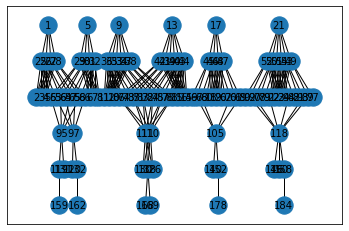

<Figure size 1.08e+06x540000 with 0 Axes>

In [23]:
# Tree pruning in the Assembly of attractor fields
# imports
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np

# Generate the graph with the paths
T = nx.Graph()
# T.add_nodes_from(d_pairs.keys())
T.add_edges_from(l_edges_dict)

# Generate the Layout with dot
pos = graphviz_layout(T, prog="dot")
# Fix the position problem, string to int
aux_pos ={}
for key in pos.keys():
    aux_pos[int(key)] = pos[key]
pos = aux_pos
# Generate the graph with the data an information
nx.draw_networkx(T, pos, font_size=10)
# Show the graph with parameters
plt.figure(figsize=(1200,600), dpi=900)
plt.show()

# Generate full tree for enumerate method

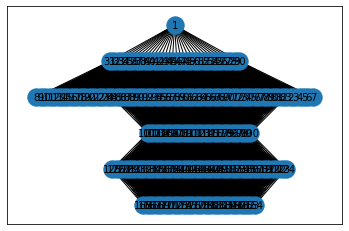

<Figure size 1.08e+06x540000 with 0 Axes>

In [24]:
# Generate the edges
l_aux = []
v_begin = 1
for element in o_rdda.list_signal_pairs:
    l_aux.append(list(range(v_begin , v_begin + len(element))))
    v_begin = v_begin + len(element)
# for element in l_aux:
#     print(element)

l_path_edge = []
for v_index in range(0,len(l_aux)-1):
    l_path_edge = l_path_edge + list(product(l_aux[v_index],l_aux[v_index+1]))
    # print(l_path_edge)

# Generate the graph with the paths
T = nx.Graph()
T.add_edges_from(l_path_edge)

# Generate the Layout with dot
pos = graphviz_layout(T, prog="dot")
# Fix the position problem, string to int
aux_pos ={}
for key in pos.keys():
    aux_pos[int(key)] = pos[key]
pos = aux_pos
# Generate the graph with the data an information
nx.draw_networkx(T, pos, font_size=10)
# Show the graph with parameters
plt.figure(figsize=(1200,600), dpi=900)
plt.show()